# 🎧 Most Streamed Spotify Songs 2024 - Data visualization
The goal is to explore and analyze the "Most Streamed Spotify Songs 2024", to uncover insights about music streaming trends, track score analysis and cross-platform presence. By examining the data, we aim to present key findings that highlight the factors contributing to a song's popularity. This analysis will provide a deeper understanding of how different attributes, such as platforms and whether a track is explicit, affect its streaming success and how these trends have evolved over time.

In [100]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Be able to see all columns
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)

In [102]:
# Loadind data
data = pd.read_csv('dataset/spotify_2024.csv', encoding='latin1')
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [104]:
df = data.copy()
df.shape

(4600, 29)

### Type of variables

<Axes: ylabel='count'>

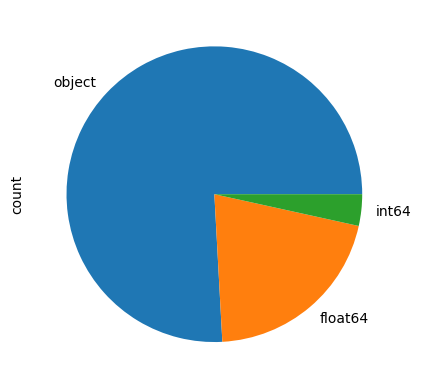

In [107]:
df.dtypes.value_counts().plot.pie()

### Heatmap of Missing values

Before diving into data analysis, it's crucial to understand the completeness of our dataset. Missing data can skew results and lead to incorrect conclusions if not handled properly.

<Axes: >

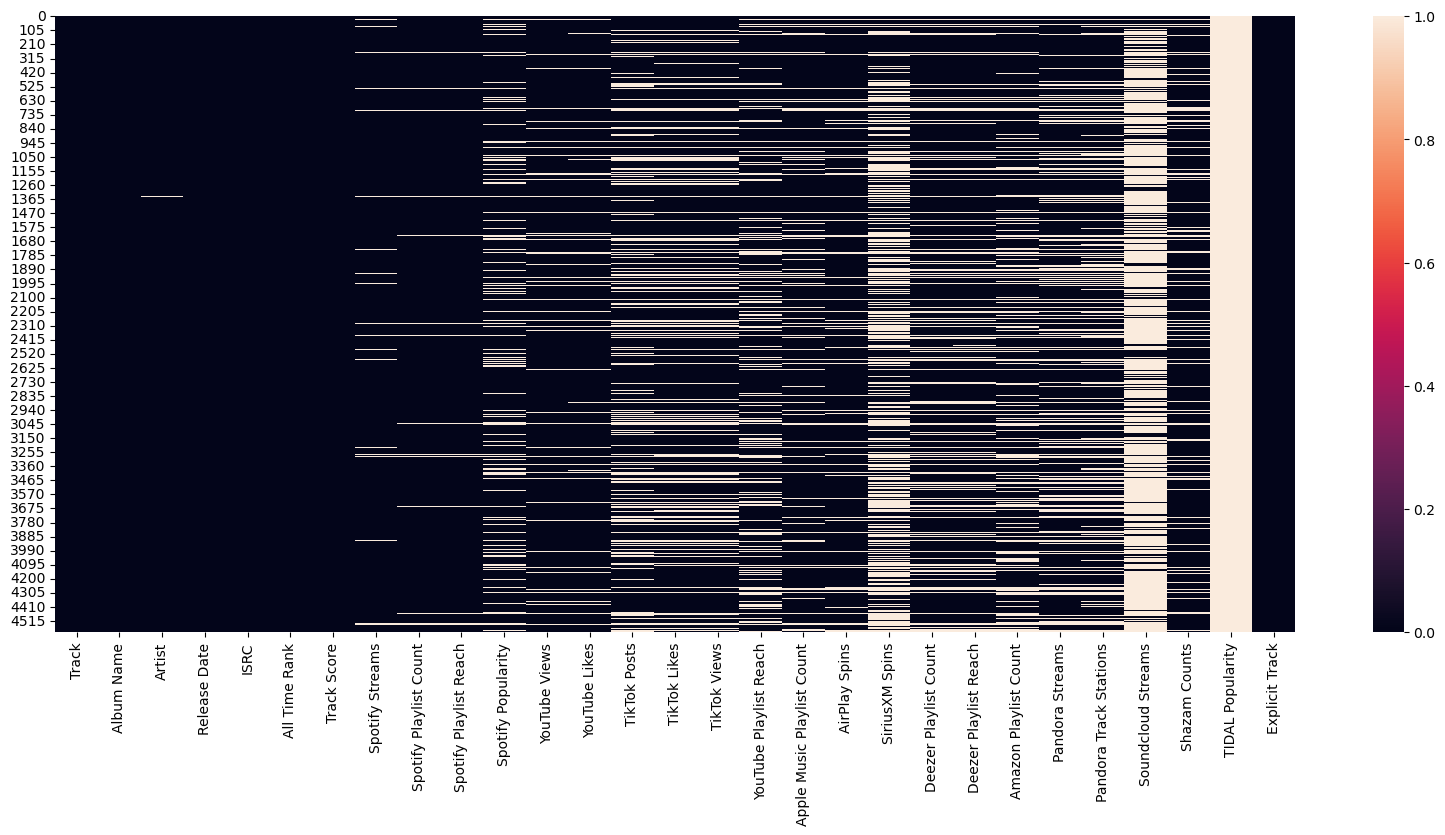

In [110]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isna())

The column "TIDAL Popularity" is entirely empty and is therefore removed from the analysis.

In [113]:
# The column 'TIDAL Popularity' is entirely empty
df = df.drop('TIDAL Popularity', axis=1)

## Feature selection/engineering

In [116]:
# Columns to convert
convert_to_float = ['All Time Rank','Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 
                    'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 
                    'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']

df[convert_to_float] = df[convert_to_float].replace({',': ''}, regex=True).astype(float)

In [118]:
# Feature engineering
# convert 'Release Date' to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Get today's date
today = pd.to_datetime(datetime.today().date())

# Calculate the number of days since the song was released
df['Days Since Release'] = (today - df['Release Date']).dt.days
df['Year'] = df['Release Date'].dt.year

In [120]:
# Feature selection
# Work on a copy of the datasset
float_var = list(df.select_dtypes('float').columns)
int_var = list(df.select_dtypes('int').columns)

df = df[['Artist','Track'] + int_var + float_var]

# Drop rows with more than 5 missing values because of duplicates and inconsistant values
df_cleaned = df.dropna(thresh=len(df.columns) - 5)

## Top 10 Most Streamed Tracks and Artists

Identifying the top 10 most streamed tracks gives insight into what music is resonating most with listeners on Spotify. Understanding these leaders can provide a baseline for comparing other metrics and platforms.

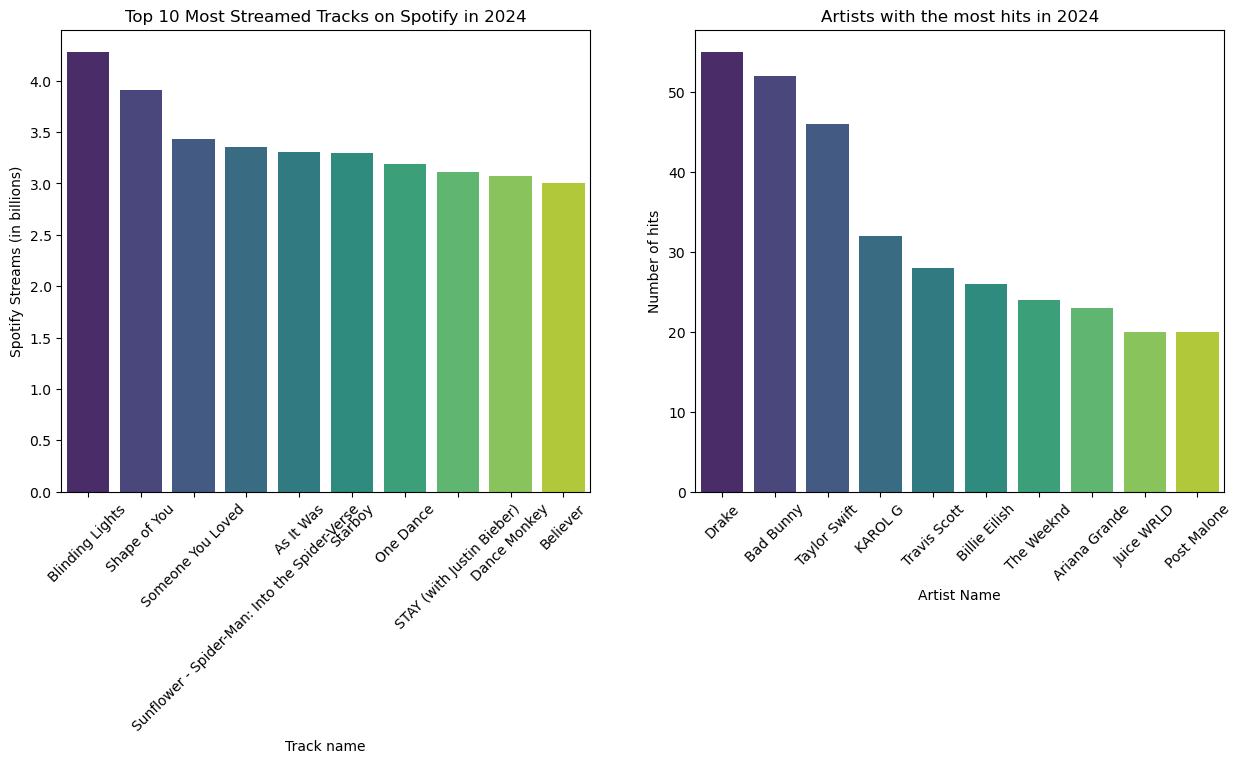

In [123]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 1. Top 10 Most Streamed Tracks on Spotify in 2024
top_10_tracks = df_cleaned.nlargest(10, 'Spotify Streams')
# Streams en milliard
streams_spotify_in_billions = top_10_tracks['Spotify Streams'] / 1_000_000_000
sns.barplot(x='Track', y=streams_spotify_in_billions, data=top_10_tracks, palette='viridis', hue='Track', ax=axes[0]) 
axes[0].set_title('Top 10 Most Streamed Tracks on Spotify in 2024')
axes[0].set_ylabel('Spotify Streams (in billions)')
axes[0].set_xlabel('Track name')
axes[0].tick_params(axis='x', labelrotation=45)

# 1. Artists with the most hits
songs_per_artist = df_cleaned.groupby('Artist',as_index=False).count().sort_values(by='Track',ascending=False)[["Artist" ,"Track"]]
sns.barplot(x='Artist', y='Track', data=songs_per_artist.iloc[:10], palette="viridis", hue='Artist', ax=axes[1])
axes[1].set_title('Artists with the most hits')
axes[1].set_ylabel('Number of hits')
axes[1].set_xlabel('Artist Name')
axes[1].tick_params(axis='x', labelrotation=45)

## Top 10 Track Popularity Across Platforms

Music tracks can perform differently across various platforms depending on user demographics, platform algorithms, and content formats. Analyzing cross-platform performance provides a comprehensive view of a song’s overall popularity.

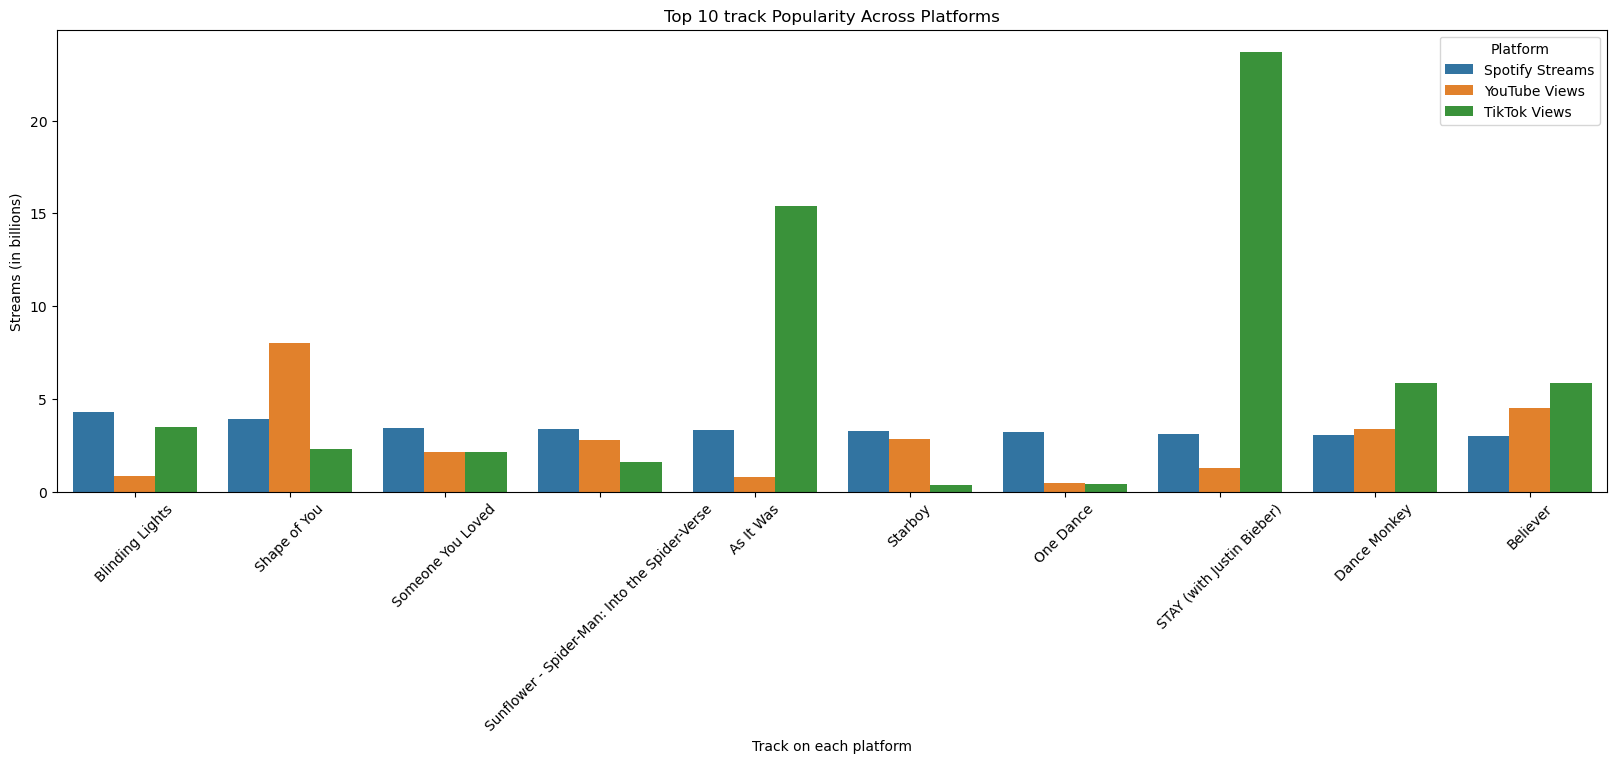

In [126]:
platforms = ['Spotify Streams', 'YouTube Views', 'TikTok Views']
melted_data = top_10_tracks.melt(id_vars=['Track'], value_vars=platforms, var_name='Platform', value_name='Streams')
melted_data['Streams'] = melted_data['Streams'] / 1_000_000_000

plt.figure(figsize=(20, 6))
sns.barplot(x='Track', y='Streams', hue='Platform', data=melted_data)
plt.xlabel('Track on each platform')
plt.ylabel('Streams (in billions)')
plt.title('Top 10 track Popularity Across Platforms')
plt.xticks(rotation=45)
plt.show()

**TikTok's Dominance:** For certain tracks like "As It Was" and "STAY (with Justin Bieber)", TikTok views significantly outnumber streams on Spotify and YouTube views. This illustrates TikTok's immense influence in driving music popularity. The short-form video platform allows tracks to go viral quickly, reaching millions of users in a short period.

TikTok has revolutionized music discovery by integrating music into user-generated content. A catchy song snippet can inspire thousands of videos, amplifying its reach and driving streams on other platforms.

## Platform Popularity Comparison

Understanding which platforms dominate in terms of streams/views helps to focus marketing efforts and understand user behavior. This comparison provides a broader context for platform-specific success.

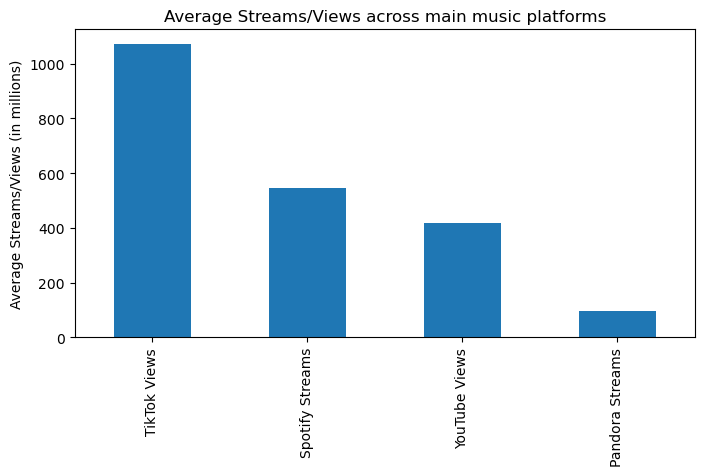

In [130]:
# List of platforms
platforms = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams']

# We should keep lines without missing info to have an accurate insight
df_cleaned = df[platforms].dropna(axis=0)

platform_means = (df_cleaned.mean(axis=0)) / 1_000_000
platform_means.sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title('Average Streams/Views across main music platforms')
plt.ylabel('Average Streams/Views (in millions)')
plt.show()



- **TikTok's Outperformance:** TikTok leads significantly in average views compared to Spotify and YouTube. This dominance underscores TikTok's role in shaping music trends, particularly among younger demographics who are the primary users of the platform.
- **Strategic Implications:** For artists and record labels, these insights suggest that focusing on TikTok as part of a marketing strategy can significantly boost a track's visibility and overall success across multiple platforms. TikTok's ability to generate massive viewership in a short time makes it a critical tool for music promotion.

## Track Score Analysis

The Track Score is a composite metric that aims to quantify the overall popularity, quality, and impact of a song. This score is typically calculated by aggregating various factors that contribute to a track's success. Analyzing track scores over time helps identify trends in music quality or popularity, revealing how the industry or listener preferences might have evolved.

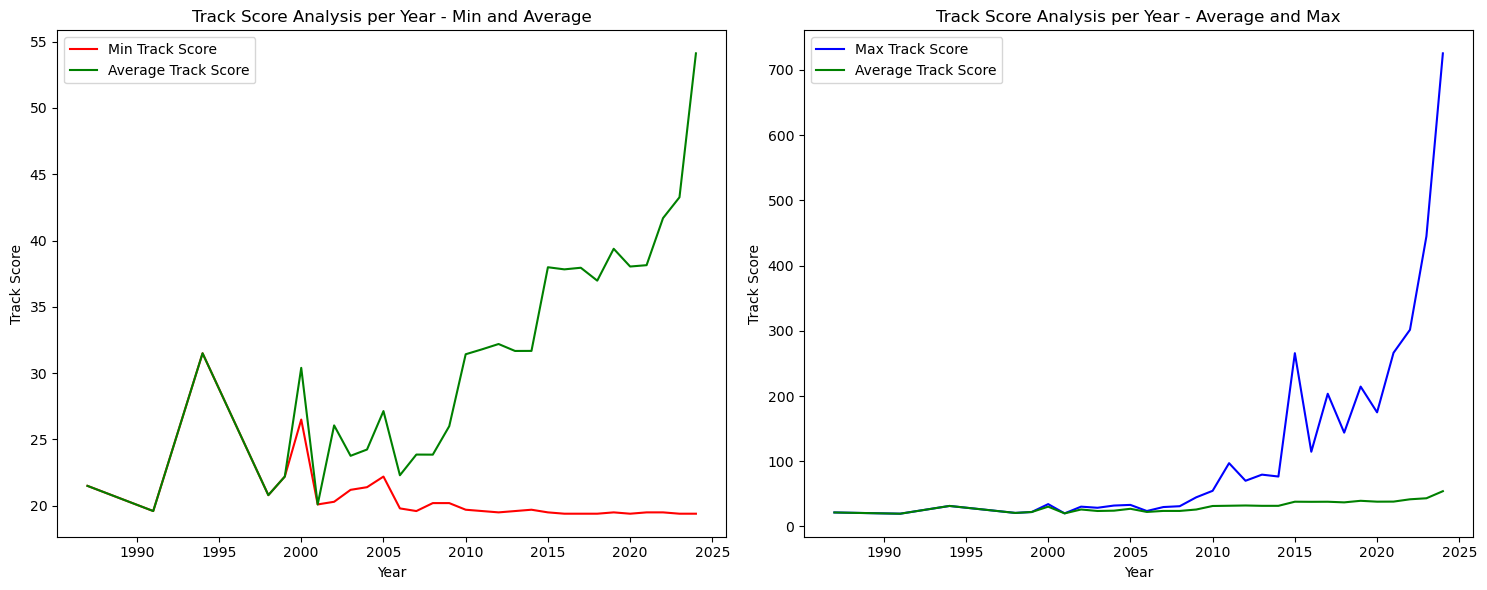

In [134]:
# Group by Year and calculate the metrics
track_score_stats = df.groupby('Year')['Track Score'].agg(['mean', 'min', 'max']).reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 1. Track score per year - min and average
sns.lineplot(x='Year', y='min', data=track_score_stats, label='Min Track Score', color='red', ax=axes[0])
sns.lineplot(x='Year', y='mean', data=track_score_stats, label='Average Track Score', color='green', ax=axes[0])
axes[0].set_title('Track Score Analysis per Year - Min and Average')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Track Score')

# 2. Track score per year - max and average
sns.lineplot(x='Year', y='max', data=track_score_stats, label='Max Track Score', color='blue', ax=axes[1])
sns.lineplot(x='Year', y='mean', data=track_score_stats, label='Average Track Score', color='green', ax=axes[1])
axes[1].set_title('Track Score Analysis per Year - Average and Max')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Track Score')

plt.tight_layout()
plt.show()


The analysis reveals two significant trends: The steady improvement in the average quality or popularity of tracks over the years, and the emergence of exceptionally high-performing tracks in the past decade. The increasing disparity between the top and bottom-performing tracks highlights the competitive nature of the modern music industry, where a few hits dominate the charts, while others struggle to make a significant impact.

##   Interest in Explicit Music

Explicit content in music refers to lyrics, themes, or language that may be deemed inappropriate for certain audiences, particularly younger listeners. Music with explicit content is often marked with a "Parental Advisory" label to inform listeners of the mature themes. Streaming platforms like Spotify, Apple Music, and others typically provide a way to filter or avoid explicit content, particularly for younger audiences.

Understanding the impact of explicit content on streaming can offer insights into how different types of content resonate with audiences. It can also help artists and record labels make informed decisions about the content of their music and how it might affect their reach and popularity.

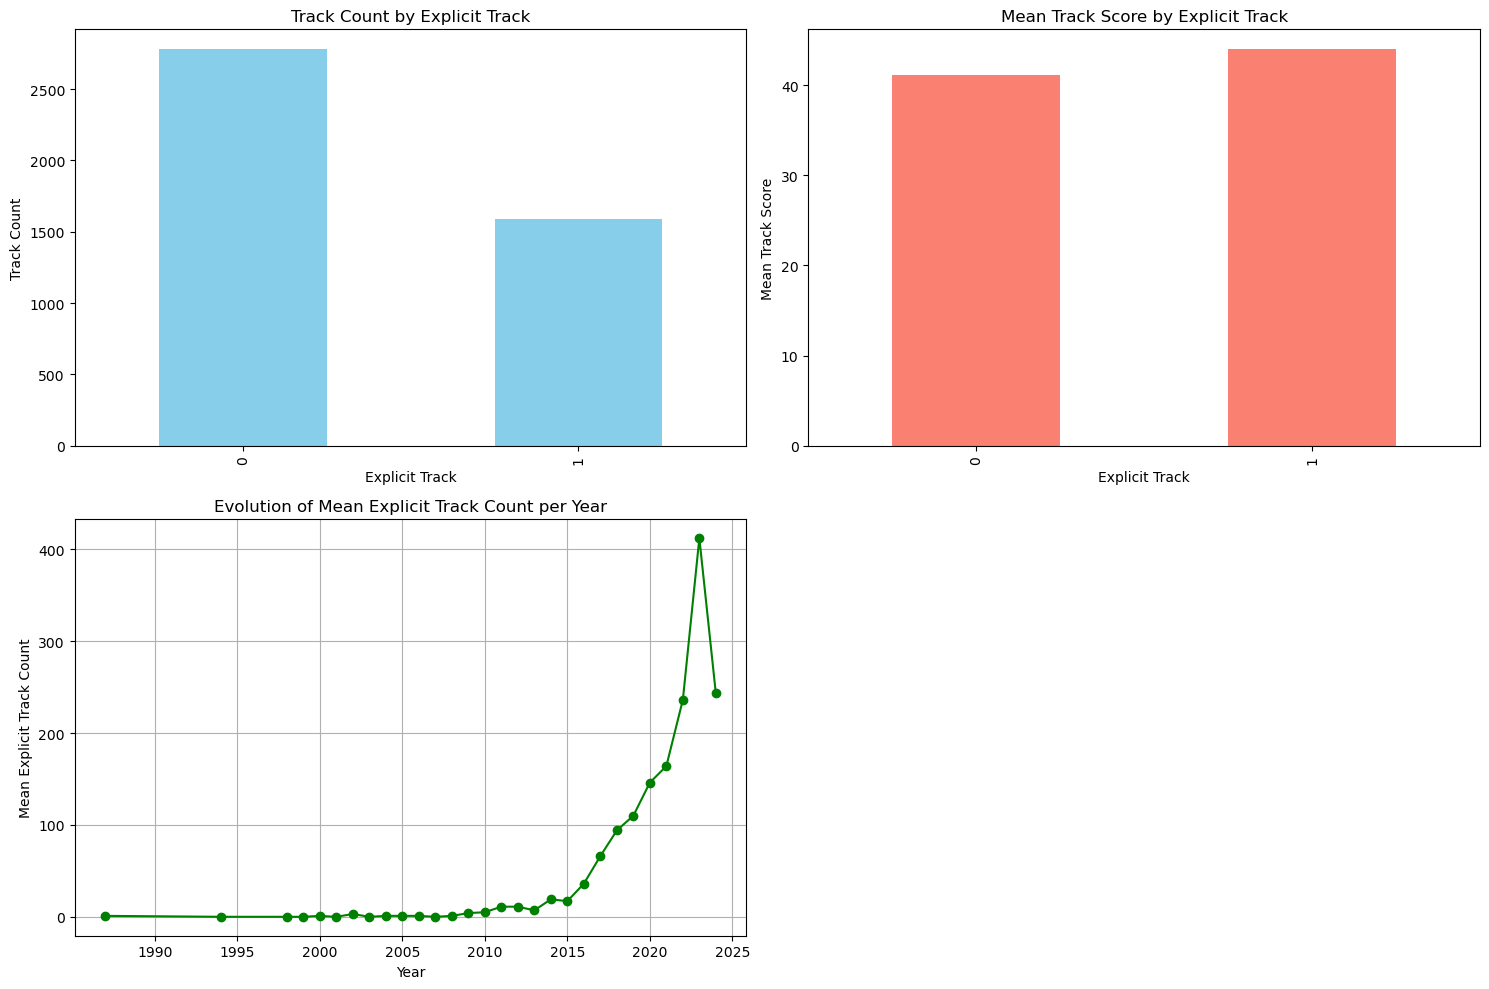

In [138]:
explicit_track = df.loc[:, ['Explicit Track', 'Spotify Streams', 'Track', 'Track Score', 'Year']]
explicit_track.drop_duplicates(subset='Track', keep='first', inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 1. Track Count by Explicit Track (Bar Plot)
track_count = explicit_track.groupby('Explicit Track')['Track'].count()
track_count.plot(kind='bar', color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Track Count by Explicit Track')
axes[0,0].set_xlabel('Explicit Track')
axes[0,0].set_ylabel('Track Count')

# 2. Mean Track Score by Explicit Track (Bar Plot)
track_score_mean = explicit_track.groupby('Explicit Track')['Track Score'].mean()
track_score_mean.plot(kind='bar', color='salmon', ax=axes[0,1])
axes[0,1].set_title('Mean Track Score by Explicit Track')
axes[0,1].set_xlabel('Explicit Track')
axes[0,1].set_ylabel('Mean Track Score')

# 3. Evolution of the Mean Explicit Track Count per Year (Line Plot)
mean_explicit_per_year = explicit_track.groupby('Year')['Explicit Track'].sum()
mean_explicit_per_year.plot(kind='line', marker='o', color='green', ax=axes[1,0])
axes[1,0].set_title('Evolution of Mean Explicit Track Count per Year')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Mean Explicit Track Count')
axes[1,0].grid(True)

# Remove the last empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


The analysis of explicit content in music streaming reveals its significant role in the modern music landscape. Explicit content, far from limiting a song's reach, can often enhance its appeal, particularly among younger demographics who value authenticity and relatability in the music they consume. As societal attitudes continue to evolve, the prevalence and impact of explicit content in music will likely remain a key area of interest for artists, record labels, and marketers alike.